<a href="https://colab.research.google.com/github/Ntebo97/customer-risk-intelligence-engine/blob/main/customer_risk_intelligence_engine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import random

# Set seed for reproducibility
np.random.seed(42)
random.seed(42)

# Number of customers
n = 1000

# Generate customer IDs
customer_ids = [f"CUST{str(i).zfill(4)}" for i in range(1, n+1)]

# Age: 18–70
age = np.random.randint(18, 70, size=n)

# Income: R3000 to R60,000
income = np.random.randint(3000, 60000, size=n)

# Education level
education_levels = ['High School', 'Diploma', 'Degree', 'Postgrad']
education_level = np.random.choice(education_levels, size=n, p=[0.4, 0.3, 0.2, 0.1])

# Employment status
employment_statuses = ['Employed', 'Self-employed', 'Unemployed']
employment_status = np.random.choice(employment_statuses, size=n, p=[0.6, 0.25, 0.15])

# Account age (in months)
account_age_months = np.random.randint(1, 120, size=n)

# Credit limit
credit_limit = np.random.randint(1000, 80000, size=n)

# Average monthly spend
avg_monthly_spend = income * np.random.uniform(0.2, 0.8, size=n)

# Missed payments (0–5)
missed_payments = np.random.poisson(0.8, size=n)

# Debt-to-income ratio (0–1.5)
debt_to_income = np.round(np.random.beta(2, 5, size=n) * 1.5, 2)

# Risk level: based on missed payments + debt ratio
risk_level = []
for mp, dti in zip(missed_payments, debt_to_income):
    if mp >= 3 or dti > 1:
        risk_level.append('high')
    elif mp == 1 or dti > 0.6:
        risk_level.append('medium')
    else:
        risk_level.append('low')

# Create DataFrame
df = pd.DataFrame({
    'customer_id': customer_ids,
    'age': age,
    'income': income,
    'education_level': education_level,
    'employment_status': employment_status,
    'account_age_months': account_age_months,
    'credit_limit': credit_limit,
    'avg_monthly_spend': np.round(avg_monthly_spend, 2),
    'missed_payments': missed_payments,
    'debt_to_income': debt_to_income,
    'risk_level': risk_level
})

df.head()


,customer_id,age,income,education_level,employment_status,account_age_months,credit_limit,avg_monthly_spend,missed_payments,debt_to_income,risk_level
0,CUST0001,56,42650,Diploma,Unemployed,66,27177,19468.87,0,0.06,low
1,CUST0002,69,37674,High School,Employed,101,5765,22119.58,1,0.25,medium
2,CUST0003,46,38854,Postgrad,Self-employed,6,21354,25143.54,2,0.17,low
3,CUST0004,32,49271,High School,Employed,108,24929,16719.37,0,0.61,medium
4,CUST0005,60,11152,Diploma,Employed,18,29820,4942.51,0,0.88,medium


Shape of dataset: (1000, 11)

Data types:
 customer_id            object
age                     int64
income                  int64
education_level        object
employment_status      object
account_age_months      int64
credit_limit            int64
avg_monthly_spend     float64
missed_payments         int64
debt_to_income        float64
risk_level             object
dtype: object

Missing values:
 customer_id           0
age                   0
income                0
education_level       0
employment_status     0
account_age_months    0
credit_limit          0
avg_monthly_spend     0
missed_payments       0
debt_to_income        0
risk_level            0
dtype: int64

Risk level distribution:
 risk_level
medium    0.487
low       0.447
high      0.066
Name: proportion, dtype: float64


/tmp/ipython-input-2-1042477042.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='risk_level', order=['low', 'medium', 'high'], palette='Set2')


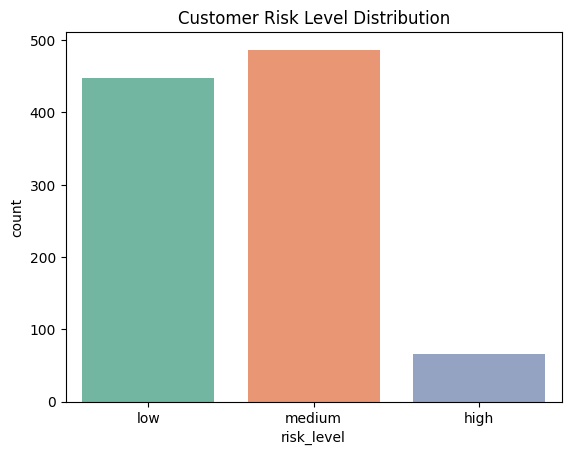

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Show shape and data types
print("Shape of dataset:", df.shape)
print("\nData types:\n", df.dtypes)

# Check for missing values
print("\nMissing values:\n", df.isnull().sum())

# Check class balance for target
print("\nRisk level distribution:\n", df['risk_level'].value_counts(normalize=True))

# Plot risk level counts
sns.countplot(data=df, x='risk_level', order=['low', 'medium', 'high'], palette='Set2')
plt.title("Customer Risk Level Distribution")
plt.show()


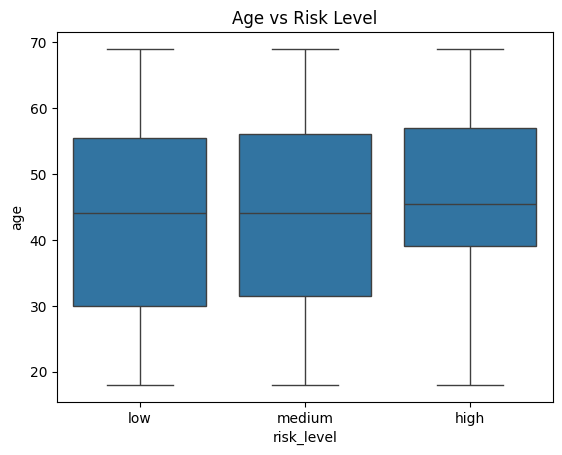

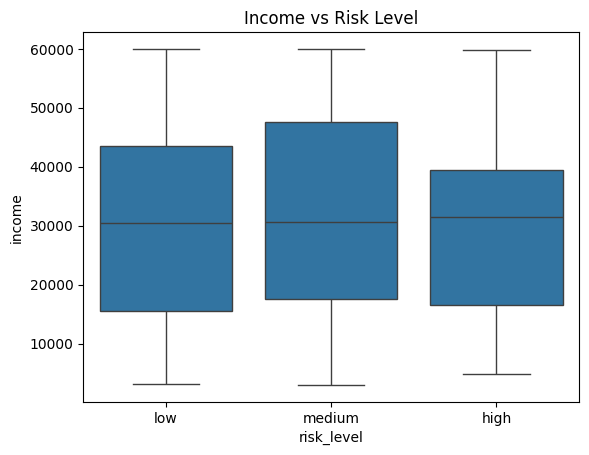

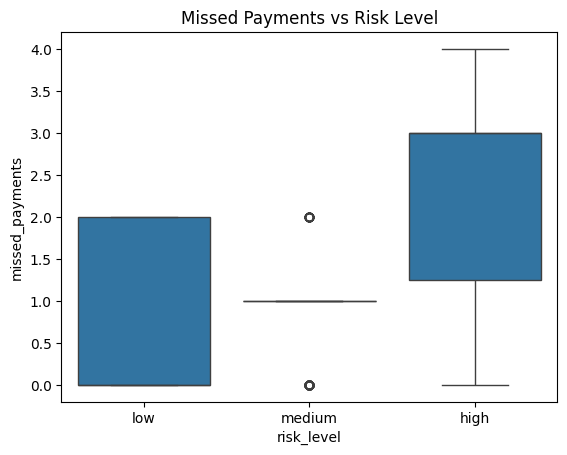

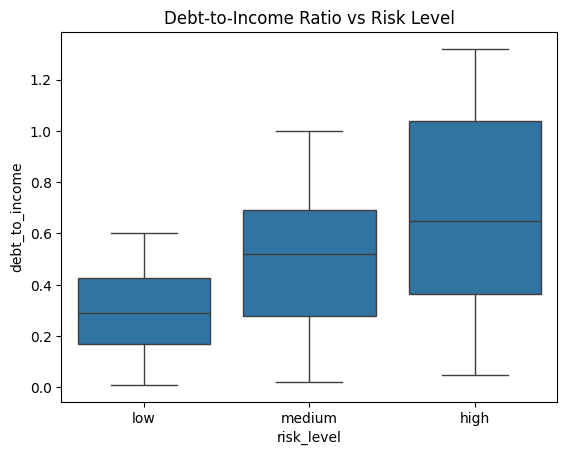

In [ ]:
# Age vs Risk Level
sns.boxplot(data=df, x='risk_level', y='age', order=['low', 'medium', 'high'])
plt.title("Age vs Risk Level")
plt.show()

# Income vs Risk Level
sns.boxplot(data=df, x='risk_level', y='income', order=['low', 'medium', 'high'])
plt.title("Income vs Risk Level")
plt.show()

# Missed Payments vs Risk Level
sns.boxplot(data=df, x='risk_level', y='missed_payments', order=['low', 'medium', 'high'])
plt.title("Missed Payments vs Risk Level")
plt.show()

# Debt-to-Income vs Risk Level
sns.boxplot(data=df, x='risk_level', y='debt_to_income', order=['low', 'medium', 'high'])
plt.title("Debt-to-Income Ratio vs Risk Level")
plt.show()


In [ ]:
df['risk_level'].value_counts(normalize=True)

,proportion
risk_level,
medium,0.487
low,0.447
high,0.066


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Copy of original data
data = df.copy()

# Encode categorical features
data['education_level'] = LabelEncoder().fit_transform(data['education_level'])
data['employment_status'] = LabelEncoder().fit_transform(data['employment_status'])
data['risk_level'] = data['risk_level'].map({'low': 0, 'medium': 1, 'high': 2})  # Target

# Features and target
X = data.drop(columns=['customer_id', 'risk_level'])
y = data['risk_level']

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# (Optional) Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Train model
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

# Predict
y_pred_log = log_reg.predict(X_test_scaled)

# Evaluate
print("🔎 Logistic Regression Results")
print(confusion_matrix(y_test, y_pred_log))
print(classification_report(y_test, y_pred_log, target_names=['low', 'medium', 'high']))


🔎 Logistic Regression Results
[[53 36  0]
 [32 62  4]
 [ 0  5  8]]
              precision    recall  f1-score   support

         low       0.62      0.60      0.61        89
      medium       0.60      0.63      0.62        98
        high       0.67      0.62      0.64        13

    accuracy                           0.61       200
   macro avg       0.63      0.61      0.62       200
weighted avg       0.62      0.61      0.61       200



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Train model
dtree = DecisionTreeClassifier(max_depth=5, random_state=42)
dtree.fit(X_train, y_train)

# Predict
y_pred_tree = dtree.predict(X_test)

# Evaluate
print("🌳 Decision Tree Results")
print(confusion_matrix(y_test, y_pred_tree))
print(classification_report(y_test, y_pred_tree, target_names=['low', 'medium', 'high']))

🌳 Decision Tree Results
[[89  0  0]
 [ 0 98  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        89
      medium       1.00      1.00      1.00        98
        high       1.00      1.00      1.00        13

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



🌲 Random Forest Results
[[87  2  0]
 [ 0 98  0]
 [ 0  1 12]]
              precision    recall  f1-score   support

         low       1.00      0.98      0.99        89
      medium       0.97      1.00      0.98        98
        high       1.00      0.92      0.96        13

    accuracy                           0.98       200
   macro avg       0.99      0.97      0.98       200
weighted avg       0.99      0.98      0.98       200



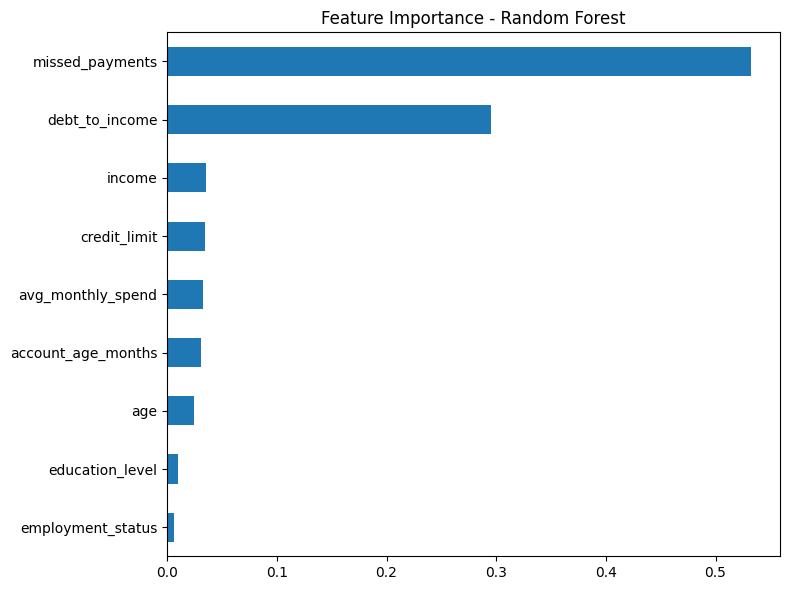

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict
y_pred_rf = rf.predict(X_test)

# Evaluate
print("🌲 Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, target_names=['low', 'medium', 'high']))

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=True).plot(kind='barh', figsize=(8,6), title='Feature Importance - Random Forest')
plt.tight_layout()
plt.show()

In [ ]:
!pip install xgboost

import xgboost as xgb
from xgboost import XGBClassifier

# Train model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate
print("⚡ XGBoost Results")
print(confusion_matrix(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb, target_names=['low', 'medium', 'high']))


⚡ XGBoost Results
[[89  0  0]
 [ 0 98  0]
 [ 0  0 13]]
              precision    recall  f1-score   support

         low       1.00      1.00      1.00        89
      medium       1.00      1.00      1.00        98
        high       1.00      1.00      1.00        13

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:41:09] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [ ]:
xgb_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/training.py:183: UserWarning: [08:50:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [ ]:
def predict_customer_risk(new_data, model, scaler, features):
    """
    Predict risk level for a new customer.
    new_data: dict of feature values
    model: trained XGBoost model
    scaler: fitted StandardScaler
    features: list of feature names
    """
    # Convert to DataFrame
    df_new = pd.DataFrame([new_data])

    # Align feature order
    df_new = df_new[features]

    # Scale numerical features
    df_scaled = scaler.transform(df_new)

    # Predict
    pred = model.predict(df_scaled)[0]

    # Map result
    risk_map = {0: 'low', 1: 'medium', 2: 'high'}
    return risk_map[pred]

In [ ]:
# Define the input features (same order as X.columns)
features = list(X.columns)

sample_customer = {
    'age': 32,
    'income': 18000,
    'education_level': 1,  # e.g. Diploma
    'employment_status': 0,  # e.g. Employed
    'account_age_months': 18,
    'credit_limit': 15000,
    'avg_monthly_spend': 9000,
    'missed_payments': 1,
    'debt_to_income': 0.55
}

# Predict risk
predicted_risk = predict_customer_risk(sample_customer, xgb_model, scaler, features)
print("🔮 Predicted Risk Level:", predicted_risk)


🔮 Predicted Risk Level: low


In [ ]:
import joblib

# Save model and scaler
joblib.dump(xgb_model, 'risk_engine_model.pkl')
joblib.dump(scaler, 'risk_engine_scaler.pkl')

# Save the list of features
import json
with open('model_features.json', 'w') as f:
    json.dump(features, f)

